In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from datetime import datetime, timedelta
import scipy.stats as stats
import pingouin as pg

fig = plt.figure(figsize=(12,8))
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

<Figure size 1200x800 with 0 Axes>

In [3]:
# Loading the two datasets
purpleair = pd.read_csv(r'C:\Users\OPEJINA22\OneDrive - East Carolina University\Desktop\Fall 2023\Thesis GEOG 7000\Data\The Two Data\Cleaned_GeoAir_Data.csv')

In [4]:
purpleair.shape

(387876, 6)

In [5]:
geoair = pd.read_csv(r'C:\Users\OPEJINA22\OneDrive - East Carolina University\Desktop\Fall 2023\Thesis GEOG 7000\Data\The Two Data\Cleaned_PurpleAir_Data.csv')

In [6]:
geoair.shape

(368692, 6)

In [7]:
Variables = pd.read_csv(r'C:\Users\OPEJINA22\OneDrive - East Carolina University\Desktop\Fall 2023\Thesis GEOG 7000\Data\The Two Data\Variables.csv')

In [8]:
Variables.shape

(101, 12)

In [9]:
purpleair.head()

,datetime,new_lat,new_lon,ID.1,PM25,place
0,2021-09-26 00-00,34.833961,-77.661139,P12,12.31,Home
1,2021-09-26 00-00,35.190660,-77.670215,P15,2.19,Home
2,2021-09-26 00-00,35.403127,-77.728539,P11,2.23,Home
3,2021-09-26 00-00,35.542208,-77.363569,P5,2.36,Home
4,2021-09-26 00-00,35.542245,-77.363584,P7,1.53,Home


In [10]:
geoair.head()

,Unnamed: 0,datetime,new_lat,new_lon,ID.1,pm 2.5
0,0,2021-09-26 00-00,35.542208,-77.363569,P5,152.727997
1,1,2021-09-26 00-00,35.542245,-77.363584,P7,152.727005
2,2,2021-09-26 00-00,35.403127,-77.728539,P11,155.072998
3,3,2021-09-26 00-00,34.833961,-77.661139,P12,16.270800
4,4,2021-09-26 00-00,35.655075,-77.425822,P13,151.994003


In [11]:
Variables.head()

,ID.1,gender,gender_status,race_heritage,race_status,home_type,home_status,income_code,address_city,Income_status,address,address_status
0,P3,2,Female,1,Hispanic,1,Mobile,8,"Greenville, NC",High Income,1,Urban
1,P4,2,Female,1,Hispanic,1,Mobile,1,"Pinetown, NC",Low Income,2,Rural
2,P5,2,Female,1,Hispanic,3,Fam_attach,1,"Winterville, NC",Low Income,1,Urban
3,P6,2,Female,1,Hispanic,1,Mobile,3,JACKSONVILLE,Low Income,1,Urban
4,P7,1,Male,1,Hispanic,2,Fam_detach,10,"Winterville, NC",No_response,1,Urban


In [12]:
# Join the Purpleair data with new income data
purpleair = purpleair.merge(Variables, on='ID.1', how='left') # Left join

In [13]:
# Create a column and concatenat datetime field and ID.1 as its value for left join for purpleair data
purpleair['Filter'] = purpleair['ID.1'] + purpleair['datetime']

In [14]:
purpleair.head()

,datetime,new_lat,new_lon,ID.1,PM25,place,gender,gender_status,race_heritage,race_status,home_type,home_status,income_code,address_city,Income_status,address,address_status,Filter
0,2021-09-26 00-00,34.833961,-77.661139,P12,12.31,Home,2,Female,1,Hispanic,7,No_response,4,Chinquapin,Middle Income,2,Rural,P122021-09-26 00-00
1,2021-09-26 00-00,35.190660,-77.670215,P15,2.19,Home,1,Male,1,Hispanic,1,Mobile,2,"Kinston, NC",Low Income,2,Rural,P152021-09-26 00-00
2,2021-09-26 00-00,35.403127,-77.728539,P11,2.23,Home,2,Female,1,Hispanic,1,Mobile,2,"La Grange, NC",Low Income,2,Rural,P112021-09-26 00-00
3,2021-09-26 00-00,35.542208,-77.363569,P5,2.36,Home,2,Female,1,Hispanic,3,Fam_attach,1,"Winterville, NC",Low Income,1,Urban,P52021-09-26 00-00
4,2021-09-26 00-00,35.542245,-77.363584,P7,1.53,Home,1,Male,1,Hispanic,2,Fam_detach,10,"Winterville, NC",No_response,1,Urban,P72021-09-26 00-00


In [15]:
purpleair.shape

(387876, 18)

In [16]:
# Create a column and concatenat datetime field and ID.1 as its value for left join for geoeair data
geoair['Filter'] = geoair['ID.1'] + geoair['datetime']

In [17]:
geoair.head()

,Unnamed: 0,datetime,new_lat,new_lon,ID.1,pm 2.5,Filter
0,0,2021-09-26 00-00,35.542208,-77.363569,P5,152.727997,P52021-09-26 00-00
1,1,2021-09-26 00-00,35.542245,-77.363584,P7,152.727005,P72021-09-26 00-00
2,2,2021-09-26 00-00,35.403127,-77.728539,P11,155.072998,P112021-09-26 00-00
3,3,2021-09-26 00-00,34.833961,-77.661139,P12,16.270800,P122021-09-26 00-00
4,4,2021-09-26 00-00,35.655075,-77.425822,P13,151.994003,P132021-09-26 00-00


In [18]:
geoair.shape

(368692, 7)

In [19]:
#Join the two dataframe/datasets using the created common field ("Filter")
merged_df = pd.merge(purpleair, geoair, on='Filter', how='inner')  # inner join

In [20]:
merged_df.head()

,datetime_x,new_lat_x,new_lon_x,ID.1_x,PM25,place,gender,gender_status,race_heritage,race_status,...,Income_status,address,address_status,Filter,Unnamed: 0,datetime_y,new_lat_y,new_lon_y,ID.1_y,pm 2.5
0,2021-09-26 00-00,34.833961,-77.661139,P12,12.31,Home,2,Female,1,Hispanic,...,Middle Income,2,Rural,P122021-09-26 00-00,3,2021-09-26 00-00,34.833961,-77.661139,P12,16.270800
1,2021-09-26 00-00,35.190660,-77.670215,P15,2.19,Home,1,Male,1,Hispanic,...,Low Income,2,Rural,P152021-09-26 00-00,6,2021-09-26 00-00,35.190660,-77.670215,P15,16.452499
2,2021-09-26 00-00,35.403127,-77.728539,P11,2.23,Home,2,Female,1,Hispanic,...,Low Income,2,Rural,P112021-09-26 00-00,2,2021-09-26 00-00,35.403127,-77.728539,P11,155.072998
3,2021-09-26 00-00,35.542208,-77.363569,P5,2.36,Home,2,Female,1,Hispanic,...,Low Income,1,Urban,P52021-09-26 00-00,0,2021-09-26 00-00,35.542208,-77.363569,P5,152.727997
4,2021-09-26 00-00,35.542245,-77.363584,P7,1.53,Home,1,Male,1,Hispanic,...,No_response,1,Urban,P72021-09-26 00-00,1,2021-09-26 00-00,35.542245,-77.363584,P7,152.727005


In [21]:
merged_df.shape

(370748, 24)

In [22]:
merged_df.isnull().values.any()

True

In [23]:
# create new column and reduce the number of datetime_x column characters to 10 
max_characters = 10  # Replace with your desired maximum character length
merged_df['new_date'] = merged_df['datetime_x'].str[:max_characters]

In [24]:
merged_df.head()

,datetime_x,new_lat_x,new_lon_x,ID.1_x,PM25,place,gender,gender_status,race_heritage,race_status,...,address,address_status,Filter,Unnamed: 0,datetime_y,new_lat_y,new_lon_y,ID.1_y,pm 2.5,new_date
0,2021-09-26 00-00,34.833961,-77.661139,P12,12.31,Home,2,Female,1,Hispanic,...,2,Rural,P122021-09-26 00-00,3,2021-09-26 00-00,34.833961,-77.661139,P12,16.270800,2021-09-26
1,2021-09-26 00-00,35.190660,-77.670215,P15,2.19,Home,1,Male,1,Hispanic,...,2,Rural,P152021-09-26 00-00,6,2021-09-26 00-00,35.190660,-77.670215,P15,16.452499,2021-09-26
2,2021-09-26 00-00,35.403127,-77.728539,P11,2.23,Home,2,Female,1,Hispanic,...,2,Rural,P112021-09-26 00-00,2,2021-09-26 00-00,35.403127,-77.728539,P11,155.072998,2021-09-26
3,2021-09-26 00-00,35.542208,-77.363569,P5,2.36,Home,2,Female,1,Hispanic,...,1,Urban,P52021-09-26 00-00,0,2021-09-26 00-00,35.542208,-77.363569,P5,152.727997,2021-09-26
4,2021-09-26 00-00,35.542245,-77.363584,P7,1.53,Home,1,Male,1,Hispanic,...,1,Urban,P72021-09-26 00-00,1,2021-09-26 00-00,35.542245,-77.363584,P7,152.727005,2021-09-26


In [25]:
# Create a new column "datetime" and populate day of the week for each instance in the dataset
merged_df['day_of_week'] = pd.to_datetime(merged_df['new_date']).dt.strftime('%A')

In [26]:
# Replace all -999 in place column with "Home"
merged_df.loc[merged_df['place'] == '-999', 'place'] = 'Home'

In [27]:
merged_df.head()

,datetime_x,new_lat_x,new_lon_x,ID.1_x,PM25,place,gender,gender_status,race_heritage,race_status,...,address_status,Filter,Unnamed: 0,datetime_y,new_lat_y,new_lon_y,ID.1_y,pm 2.5,new_date,day_of_week
0,2021-09-26 00-00,34.833961,-77.661139,P12,12.31,Home,2,Female,1,Hispanic,...,Rural,P122021-09-26 00-00,3,2021-09-26 00-00,34.833961,-77.661139,P12,16.270800,2021-09-26,Sunday
1,2021-09-26 00-00,35.190660,-77.670215,P15,2.19,Home,1,Male,1,Hispanic,...,Rural,P152021-09-26 00-00,6,2021-09-26 00-00,35.190660,-77.670215,P15,16.452499,2021-09-26,Sunday
2,2021-09-26 00-00,35.403127,-77.728539,P11,2.23,Home,2,Female,1,Hispanic,...,Rural,P112021-09-26 00-00,2,2021-09-26 00-00,35.403127,-77.728539,P11,155.072998,2021-09-26,Sunday
3,2021-09-26 00-00,35.542208,-77.363569,P5,2.36,Home,2,Female,1,Hispanic,...,Urban,P52021-09-26 00-00,0,2021-09-26 00-00,35.542208,-77.363569,P5,152.727997,2021-09-26,Sunday
4,2021-09-26 00-00,35.542245,-77.363584,P7,1.53,Home,1,Male,1,Hispanic,...,Urban,P72021-09-26 00-00,1,2021-09-26 00-00,35.542245,-77.363584,P7,152.727005,2021-09-26,Sunday


In [28]:
merged_df.columns


Index(['datetime_x', 'new_lat_x', 'new_lon_x', 'ID.1_x', 'PM25', 'place',
       'gender', 'gender_status', 'race_heritage', 'race_status', 'home_type',
       'home_status', 'income_code', 'address_city', 'Income_status',
       'address', 'address_status', 'Filter', 'Unnamed: 0', 'datetime_y',
       'new_lat_y', 'new_lon_y', 'ID.1_y', 'pm 2.5', 'new_date',
       'day_of_week'],
      dtype='object')

In [29]:
# Define a  function to categorize the day_of_week in to either weekday or weekend 
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
# Apply the custom function to the 'day_week' column
merged_df['week_date'] = merged_df['day_of_week'].apply(categorize_day)

In [30]:
# Save the merge file to a folder in csv format
#merged_df.to_csv(r'C:\Users\OPEJINA22\OneDrive - East Carolina University\Desktop\Fall 2023\Thesis GEOG 7000\Data\The Two Data\Merge_Data.csv', index=False)

In [31]:
# Sepereate geoair dataframe after the data has been merged
df = merged_df[['datetime_x', 'new_lat_x', 'new_lon_x', 'ID.1_x', 'place', 'day_of_week', 'week_date', 'Income_status','gender_status', 'race_status', 'home_status', 'address_status', 'PM25', 'pm 2.5']]


In [32]:
# Rename the column names 
df.rename(columns={'datetime_x': 'datetime', 'new_lat_x': 'new_lat', 'new_lon_x':'new_long', 'ID.1_x': 'ID.1', 'PM25':'Geo', 'pm 2.5':'Pur', 'place':'place', 'day_of_week':'day_of_week', 'week_date':'week_date', 'Income_status':'Income_status'}, inplace=True)

In [33]:
df.head()

,datetime,new_lat,new_long,ID.1,place,day_of_week,week_date,Income_status,gender_status,race_status,home_status,address_status,Geo,Pur
0,2021-09-26 00-00,34.833961,-77.661139,P12,Home,Sunday,Weekend,Middle Income,Female,Hispanic,No_response,Rural,12.31,16.270800
1,2021-09-26 00-00,35.190660,-77.670215,P15,Home,Sunday,Weekend,Low Income,Male,Hispanic,Mobile,Rural,2.19,16.452499
2,2021-09-26 00-00,35.403127,-77.728539,P11,Home,Sunday,Weekend,Low Income,Female,Hispanic,Mobile,Rural,2.23,155.072998
3,2021-09-26 00-00,35.542208,-77.363569,P5,Home,Sunday,Weekend,Low Income,Female,Hispanic,Fam_attach,Urban,2.36,152.727997
4,2021-09-26 00-00,35.542245,-77.363584,P7,Home,Sunday,Weekend,No_response,Male,Hispanic,Fam_detach,Urban,1.53,152.727005


In [34]:
# Create a new column and round up the values in pm 2.5 to int 
#df['Geo'] = round(df['Geo'])
#f['Pur'] = round(df['Pur'])

In [35]:
df.head()

,datetime,new_lat,new_long,ID.1,place,day_of_week,week_date,Income_status,gender_status,race_status,home_status,address_status,Geo,Pur
0,2021-09-26 00-00,34.833961,-77.661139,P12,Home,Sunday,Weekend,Middle Income,Female,Hispanic,No_response,Rural,12.31,16.270800
1,2021-09-26 00-00,35.190660,-77.670215,P15,Home,Sunday,Weekend,Low Income,Male,Hispanic,Mobile,Rural,2.19,16.452499
2,2021-09-26 00-00,35.403127,-77.728539,P11,Home,Sunday,Weekend,Low Income,Female,Hispanic,Mobile,Rural,2.23,155.072998
3,2021-09-26 00-00,35.542208,-77.363569,P5,Home,Sunday,Weekend,Low Income,Female,Hispanic,Fam_attach,Urban,2.36,152.727997
4,2021-09-26 00-00,35.542245,-77.363584,P7,Home,Sunday,Weekend,No_response,Male,Hispanic,Fam_detach,Urban,1.53,152.727005


In [36]:
df.shape

(370748, 14)

In [37]:
# Create a new column and round up the values in pm 2.5 to int 
# purpleair_refined['abs_pm 2.5'] = np.ceil(purpleair_refined['pm 2.5']).fillna(0).astype(int)

In [38]:
df.to_csv(r'C:\Users\OPEJINA22\OneDrive - East Carolina University\Desktop\Fall 2023\Thesis GEOG 7000\Data\The Two Data\Dataset_2_Expo.csv')


In [39]:
df.describe()

,new_lat,new_long,Geo,Pur
count,370748.000000,370748.000000,370748.000000,370748.000000
mean,35.569471,-77.538175,13.101234,43.876604
std,0.274689,0.491669,82.209752,84.067849
min,34.203834,-79.374824,0.000000,1.000050
25%,35.520690,-77.667880,1.720000,4.985755
50%,35.569585,-77.388011,2.930000,9.940810
75%,35.608876,-77.335351,5.670000,22.554775
max,36.704481,-75.965158,13240.740000,1734.479980


In [40]:
male = df[df['gender_status'] == 'Male'].groupby('ID.1').mean()
male.describe()

,new_lat,new_long,Geo,Pur
count,35.000000,35.000000,35.000000,35.000000
mean,35.616102,-77.512744,8.554851,46.258445
std,0.274886,0.428560,13.697661,56.355556
min,34.988618,-79.085705,1.623826,4.582232
25%,35.548567,-77.546937,2.804431,12.734419
50%,35.571535,-77.394214,4.046734,27.301130
75%,35.615838,-77.353605,8.004609,60.881434
max,36.441318,-76.814970,68.738539,240.454879


In [41]:
female = df[df['gender_status'] == 'Female'].groupby('ID.1').mean()
female.describe()

,new_lat,new_long,Geo,Pur
count,65.000000,65.000000,65.000000,65.000000
mean,35.544997,-77.538779,15.647880,43.776154
std,0.261609,0.456696,22.865454,43.281917
min,34.695309,-79.074047,1.699526,3.795506
25%,35.431759,-77.700642,4.140902,11.112890
50%,35.564525,-77.404138,6.337840,26.875142
75%,35.602852,-77.333154,16.187773,61.830527
max,36.427385,-76.406498,105.016596,181.963546


In [42]:
a = df.groupby(['ID.1'])[['Geo', 'Pur','Income_status']].mean()
a

,Geo,Pur
ID.1,,
P100,2.695886,27.301130
P102,19.931826,11.178761
P103,1.699526,11.037757
P104,2.798707,11.246972
P105,2.390378,6.772109
...,...,...
P95,12.855662,5.190360
P96,5.425578,6.660607
P97,2.367281,43.184766


# Objective One

# Assessing Bias in the whole of the two datasets

In [43]:
# Perform a paired sample t-test
t_statistic, p_value = stats.ttest_rel(a['Pur'], a['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")

# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    
    
# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (a['Pur'] - a['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 5.94365728821684
P-value: 0.000000042
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 31.479636205015396


In [44]:
a['Pur'].describe()

count    100.000000
mean      44.644956
std       47.991497
min        3.795506
25%       11.162294
50%       27.118481
75%       61.326215
max      240.454879
Name: Pur, dtype: float64

In [45]:
a['Geo'].describe()

count    100.000000
mean      13.165320
std       20.346721
min        1.623826
25%        3.093739
50%        5.614985
75%       11.738195
max      105.016596
Name: Geo, dtype: float64

# Bias in the Home exposure estimate from the two datasets

In [46]:
hom = df[df['place'] == "Home"].groupby('ID.1')[('Pur', 'Geo')].mean()

# Perform a paired sample t-test
t_statistic, p_value = stats.ttest_rel(hom['Pur'], hom['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")

# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    
# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (hom['Pur'] - hom['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 5.735542938740224
P-value: 0.000000106
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 30.876085319070306


In [47]:
hom['Pur'].describe()

count    100.000000
mean      44.836246
std       46.560914
min        3.795506
25%       11.671666
50%       26.943027
75%       63.081700
max      203.220203
Name: Pur, dtype: float64

In [48]:
hom['Geo'].describe()

count    100.000000
mean      13.960161
std       23.423542
min        1.486462
25%        3.062737
50%        4.814488
75%       11.014974
max      106.991472
Name: Geo, dtype: float64

# Bias in the In-Transit exposure estimate from the two datasets

In [49]:
transit = df[df['place'] == "In-Transit"].groupby('ID.1')[('Pur', 'Geo')].mean()

# Perform a paired sample t-test
t_statistic, p_value = stats.ttest_rel(transit['Pur'], transit['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")

# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    
    
# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (transit['Pur'] - transit['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 4.249032082543658
P-value: 0.000050939
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 34.050898716748364


In [50]:
transit['Pur'].describe()

count     94.000000
mean      44.420992
std       53.434256
min        2.401234
25%        7.148806
50%       23.746347
75%       65.219058
max      339.557686
Name: Pur, dtype: float64

In [51]:
transit['Geo'].describe()

count     94.000000
mean      10.370093
std       56.068780
min        1.246489
25%        2.091496
50%        2.880299
75%        4.427662
max      544.943333
Name: Geo, dtype: float64

# Bias in the Work exposure estimate from the two datasets

In [52]:
work = df[df['place'] == "Work"].groupby('ID.1')[('Pur', 'Geo')].mean()

# Perform a paired sample t-test['Geo_pm2.5']
t_statistic, p_value = stats.ttest_rel(work['Pur'], work['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")

# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    

# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (work['Pur'] - work['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 4.675929483721277
P-value: 0.000023276
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 31.128968288856093


In [53]:
work['Pur'].describe()

count     50.000000
mean      38.401182
std       46.126668
min        1.869952
25%        9.098628
50%       26.485556
75%       56.323854
max      292.841623
Name: Pur, dtype: float64

In [54]:
work['Geo'].describe()

count    50.000000
mean      7.272214
std      12.165024
min       0.885000
25%       1.887230
50%       2.749378
75%       7.015807
max      61.915569
Name: Geo, dtype: float64

# Bias in the Other Places exposure estimate from the two datasets

In [55]:
other = df[df['place'] == "Other Place"].groupby('ID.1')[('Pur', 'Geo')].mean()

# Perform a paired sample t-test
t_statistic, p_value = stats.ttest_rel(other['Pur'], other['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")

# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    
    
# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (other['Pur'] - other['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 3.0098960437
P-value: 0.003399642
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 23.88633491905568


In [56]:
other['Pur'].describe()

count     90.000000
mean      42.321227
std       55.697039
min        2.352538
25%        7.368301
50%       18.743655
75%       61.058763
max      309.483111
Name: Pur, dtype: float64

In [57]:
other['Geo'].describe()

count     90.000000
mean      18.434892
std       54.848963
min        1.070000
25%        2.264504
50%        3.876954
75%        7.202634
max      429.199613
Name: Geo, dtype: float64

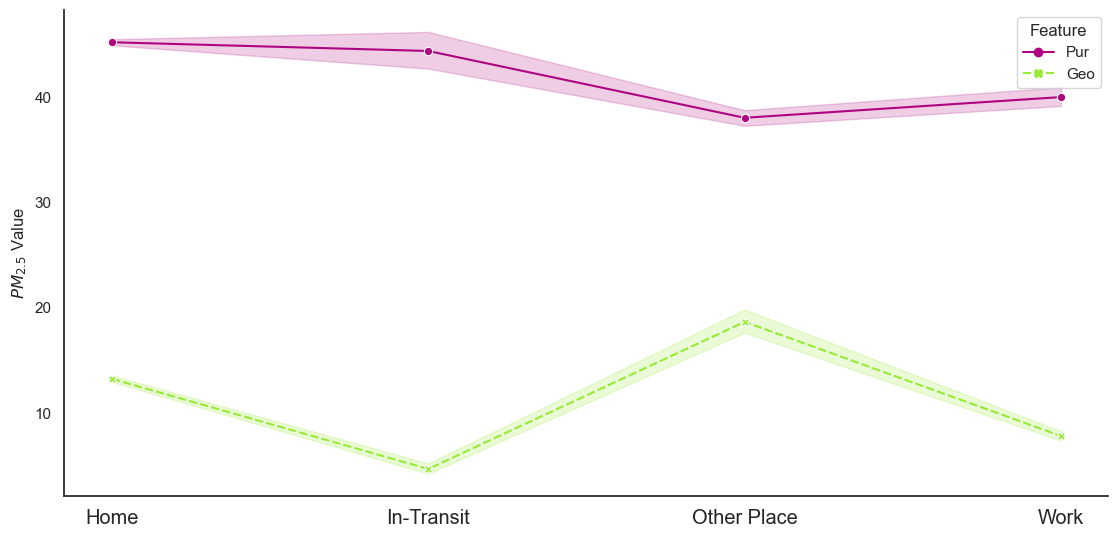

In [58]:
## Code of the Line Chart

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#97EA36']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(df, id_vars=['place'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='place', y='Values', hue='Feature', palette=colors, style='Feature', markers=True)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title

plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='large'
)

# Show the plot
plt.legend(title='Feature')
plt.savefig("place_linechart.png")
plt.show()

# Bias in the Weekdays exposure estimate from the two datasets

In [59]:
weekdays = df[df['week_date']=="Weekday"].groupby('ID.1')[('Pur', 'Geo')].mean()

# Perform a paired sample t-test
t_statistic, p_value = stats.ttest_rel(weekdays['Pur'], weekdays['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")

# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    
    
# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (weekdays['Pur'] - weekdays['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 6.034289113602688
P-value: 0.000000028
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 31.846005942725675


In [60]:
weekdays['Pur'].describe()

count    100.000000
mean      43.926146
std       47.357861
min        4.043771
25%       11.728181
50%       23.444073
75%       60.717605
max      257.291660
Name: Pur, dtype: float64

In [61]:
weekdays['Geo'].describe()

count    100.000000
mean      12.080140
std       19.590167
min        1.543225
25%        2.871631
50%        4.768475
75%        9.313357
max      105.877749
Name: Geo, dtype: float64

# Bias in the Weekend exposure estimate from the two datasets

In [62]:
weekend = df[df['week_date']=="Weekend"].groupby('ID.1')[('Pur', 'Geo')].mean()

# Perform a paired sample t-test
t_statistic, p_value = stats.ttest_rel(weekend['Pur'], weekend['Geo'])

# Display the results
print("Paired Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.9f}")


# Interpret the results
alpha = 0.05  # Set your desired level of significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired variables.")
    
    
# Assuming you have a DataFrame 'df' with columns 'Column1' and 'Column2'
mean_difference = (weekend['Pur'] - weekend['Geo']).mean()
print("Mean of Differences:", mean_difference)

Paired Sample T-Test Results:
T-statistic: 4.748549695139282
P-value: 0.000007414
Reject the null hypothesis: There is a significant difference between the paired variables.
Mean of Differences: 27.866810454010153


In [63]:
weekend['Pur'].describe()

count     94.000000
mean      43.986899
std       50.380478
min        2.022399
25%        9.193669
50%       19.874716
75%       64.086042
max      279.557421
Name: Pur, dtype: float64

In [64]:
weekend['Geo'].describe()

count     94.000000
mean      16.120089
std       29.517084
min        1.152201
25%        2.698632
50%        5.181856
75%       12.248934
max      173.004238
Name: Geo, dtype: float64

# Test-running  Time-Series Graph for the two exposure estimates 

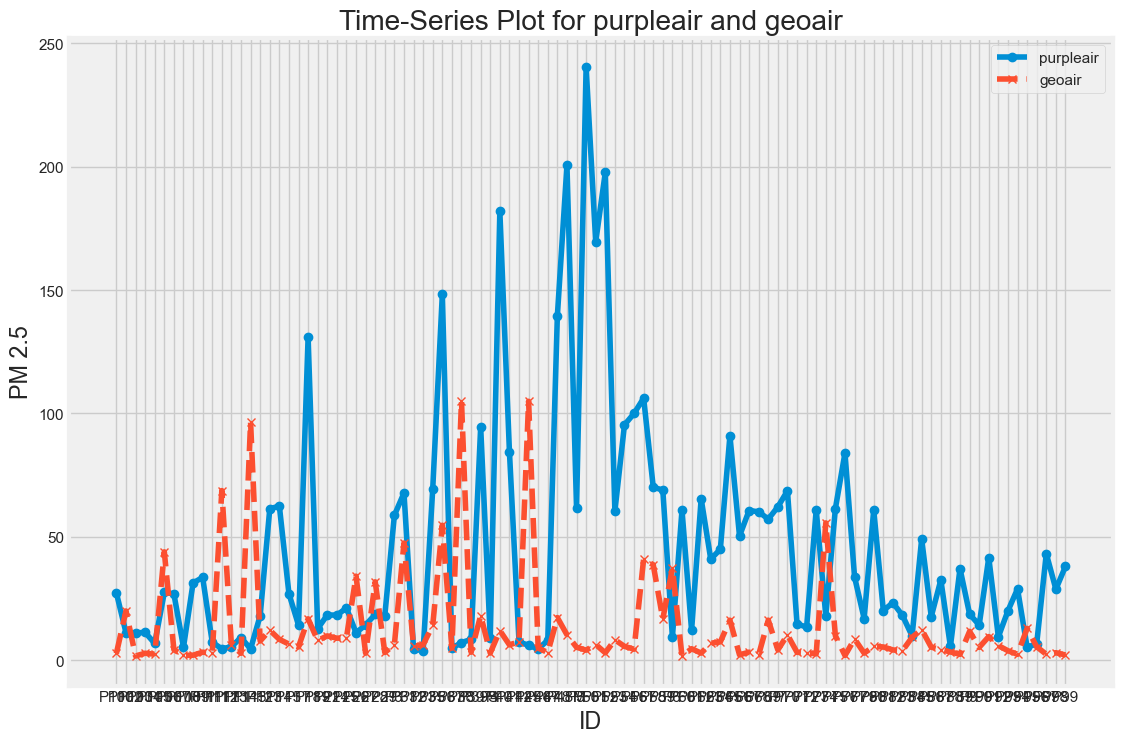

In [65]:
# Create a Datetime index
#df.set_index('datetime', inplace=True)

# Create a time-series plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.style.use('fivethirtyeight')

# Plot Dataset1
plt.plot( a['Pur'], label='purpleair', linestyle='-', marker='o'), 

# Plot Dataset2
plt.plot( a['Geo'], label='geoair', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('ID')
plt.ylabel('PM 2.5')
plt.title('Time-Series Plot for purpleair and geoair')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # You can remove this line if you don't want grid lines
plt.show()

In [66]:
# Join the Purpleair data with new income data
parameters = a.merge(Variables, on='ID.1', how='left') # Left join

In [67]:
parameters

,ID.1,Geo,Pur,gender,gender_status,race_heritage,race_status,home_type,home_status,income_code,address_city,Income_status,address,address_status
0,P100,2.695886,27.301130,1,Male,3,Black,2,Fam_detach,9,"Rocky Mount, NC",High Income,2,Rural
1,P102,19.931826,11.178761,2,Female,3,Black,3,Fam_attach,6,"Raleigh, NC",Middle Income,1,Urban
2,P103,1.699526,11.037757,2,Female,3,Black,3,Fam_attach,7,"Raleigh, NC",Middle Income,1,Urban
3,P104,2.798707,11.246972,2,Female,3,Black,2,Fam_detach,6,"Enfield, NC",Middle Income,2,Rural
4,P105,2.390378,6.772109,1,Male,3,Black,2,Fam_detach,6,"Enfield, NC",Middle Income,2,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P95,12.855662,5.190360,2,Female,2,Non-Hisp,2,Fam_detach,9,"Grifton, NC",High Income,2,Rural
96,P96,5.425578,6.660607,1,Male,2,Non-Hisp,2,Fam_detach,8,"Bath, NC",High Income,2,Rural
97,P97,2.367281,43.184766,2,Female,2,Non-Hisp,2,Fam_detach,9,"Chocowinity, NC",High Income,2,Rural
98,P98,3.007641,28.760200,1,Male,3,Black,2,Fam_detach,4,"Enfield, NC",Middle Income,2,Rural


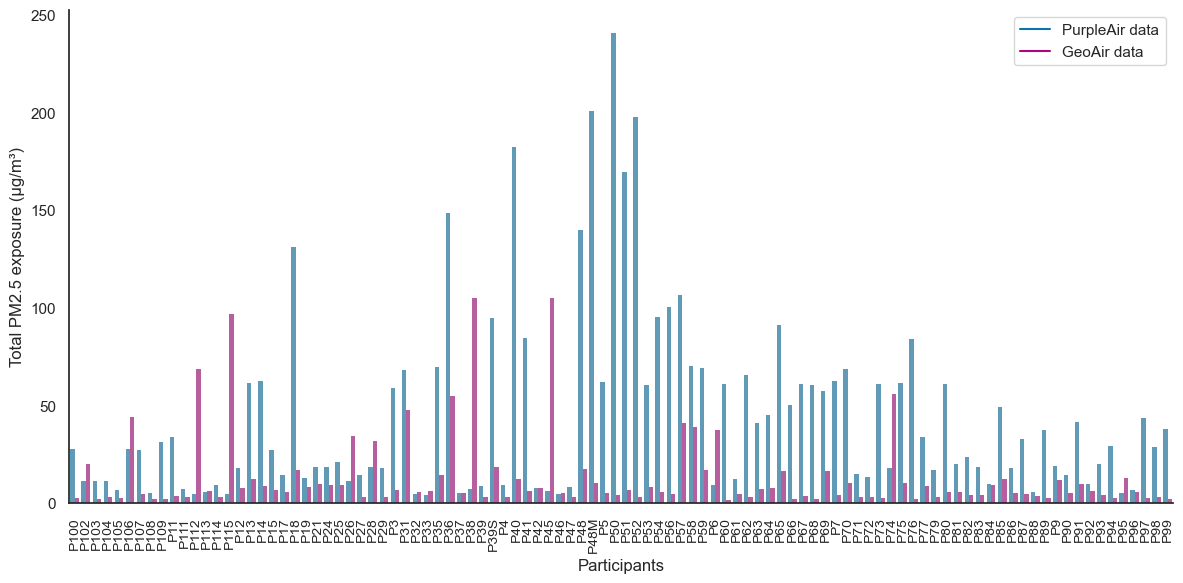

In [94]:
# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(parameters, id_vars=['ID.1'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Set the style of seaborn
sns.set(style="white")
colors = ['#0a75ad', '#AE0581'] 

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='ID.1', y='Values', hue='Feature', palette=colors, alpha=0.7, edgecolor='none', capsize=0.1)

sns.despine()

# Set labels and title
plt.xlabel('Participants')
plt.ylabel("Total PM2.5 exposure (μg/m³)")
plt.title('')

# Show the legend and rename it with colors
plt.legend(labels=['PurpleAir data', 'GeoAir data'], title='', 
           handles=[plt.Line2D([], [], color='#0a75ad'),
                    plt.Line2D([], [], color='#AE0581')])

# Show the plot
plt.xticks(rotation=90, fontsize='small')
plt.tight_layout()
plt.savefig("all exposure_barchart.png")
plt.show()

# Objective 2 | ASSESSING BASED ON INCOME 

In [95]:
# This code removes row that are not relevant to this analysis (i.e., No_response)
condition_income = ~(parameters['Income_status'] == 'No_response')  # Using ~ operator
income = parameters[condition_income]

In [96]:
lowa = income[income['Income_status'] == 'Low Income'].groupby('ID.1').mean()
mida = income[income['Income_status'] == 'Middle Income'].groupby('ID.1').mean()
higha = income[income['Income_status'] == 'High Income'].groupby('ID.1').mean()

In [97]:
income

,ID.1,Geo,Pur,gender,gender_status,race_heritage,race_status,home_type,home_status,income_code,address_city,Income_status,address,address_status
0,P100,2.695886,27.301130,1,Male,3,Black,2,Fam_detach,9,"Rocky Mount, NC",High Income,2,Rural
1,P102,19.931826,11.178761,2,Female,3,Black,3,Fam_attach,6,"Raleigh, NC",Middle Income,1,Urban
2,P103,1.699526,11.037757,2,Female,3,Black,3,Fam_attach,7,"Raleigh, NC",Middle Income,1,Urban
3,P104,2.798707,11.246972,2,Female,3,Black,2,Fam_detach,6,"Enfield, NC",Middle Income,2,Rural
4,P105,2.390378,6.772109,1,Male,3,Black,2,Fam_detach,6,"Enfield, NC",Middle Income,2,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P95,12.855662,5.190360,2,Female,2,Non-Hisp,2,Fam_detach,9,"Grifton, NC",High Income,2,Rural
96,P96,5.425578,6.660607,1,Male,2,Non-Hisp,2,Fam_detach,8,"Bath, NC",High Income,2,Rural
97,P97,2.367281,43.184766,2,Female,2,Non-Hisp,2,Fam_detach,9,"Chocowinity, NC",High Income,2,Rural
98,P98,3.007641,28.760200,1,Male,3,Black,2,Fam_detach,4,"Enfield, NC",Middle Income,2,Rural


# Exposure difference between Low, middle &High income groups when indoor and outdoor air quality is considered in exposure estimation

In [98]:
import pingouin as pg

In [99]:
aov_g = pg.welch_anova(dv='Geo', between='Income_status', data=income)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,Income_status,2,44.251194,7.511673,0.001553,0.099501


In [100]:
pg.pairwise_gameshowell(dv='Geo', between='Income_status', data=income)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,High Income,Low Income,5.306560,21.186763,-15.880203,4.960331,-3.201440,38.010024,0.007607,-0.670583
1,High Income,Middle Income,5.306560,11.215246,-5.908685,2.451485,-2.410248,29.950136,0.056366,-0.666759
2,Low Income,Middle Income,21.186763,11.215246,9.971517,5.409817,1.843226,50.106312,0.166157,0.407231


# Exposure difference between Low, middle &High income groups when only outdoor air quality is considered in exposure estimation

In [101]:
aov_p = pg.welch_anova(dv='Pur', between='Income_status', data=income)
aov_p

,Source,ddof1,ddof2,F,p-unc,np2
0,Income_status,2,54.801,0.756799,0.474006,0.020539


In [102]:
pg.pairwise_gameshowell(dv='Pur', between='Income_status', data=income)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,High Income,Low Income,36.012823,45.537557,-9.524734,10.046158,-0.948097,55.208504,0.612469,-0.214100
1,High Income,Middle Income,36.012823,32.419626,3.593197,8.092397,0.444021,45.662663,0.897275,0.124304
2,Low Income,Middle Income,45.537557,32.419626,13.117930,10.654728,1.231184,59.223807,0.439741,0.286517


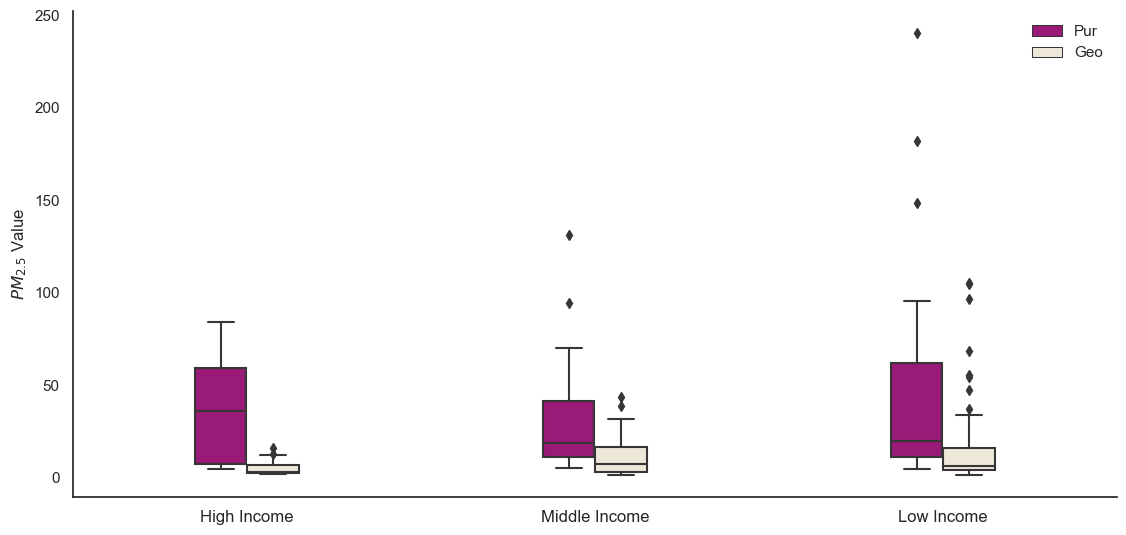

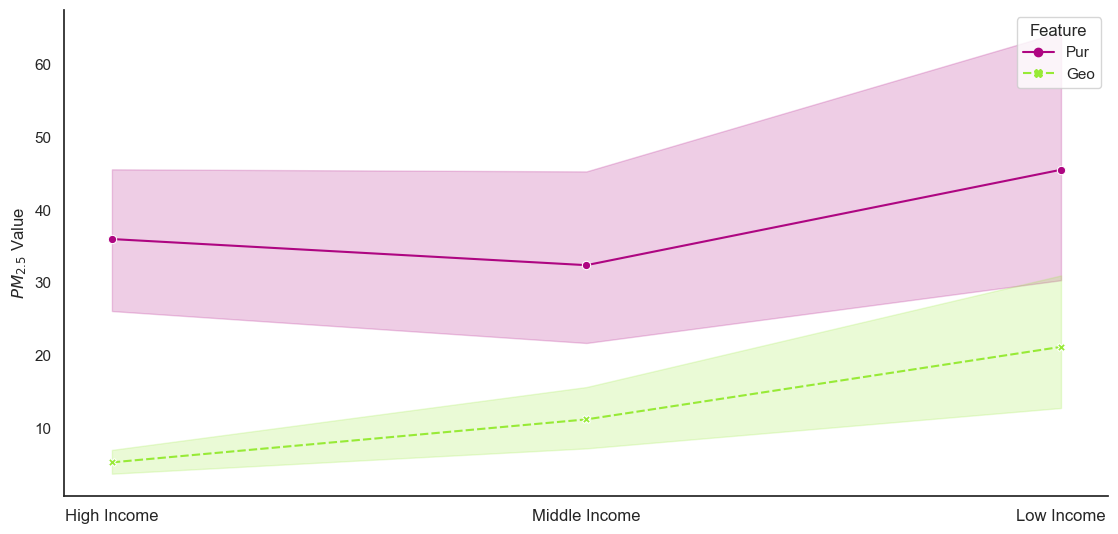

In [103]:
## Code for the BoxPlot

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#F0EAD6']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(income, id_vars=['Income_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(data=combined_df, x='Income_status', y='Values', hue='Feature', palette=colors, width=0.3, dodge=True)  # Set dodge=True to add space between groups
sns.set(font_scale=1.0)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'
)

# Show the plot
plt.savefig("Income_boxplot.png")
plt.show()


## Code of the Line Chart

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#97EA36']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(income, id_vars=['Income_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Income_status', y='Values', hue='Feature', palette=colors, style='Feature', markers=True)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title

plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'
)

# Show the plot
plt.legend(title='Feature')
plt.savefig("Income_linechart.png")
plt.show()


# Descriptive Statistic

In [104]:
lowa['Pur'].describe()

count     37.000000
mean      45.537557
std       52.495622
min        4.545853
25%       11.112890
50%       20.103721
75%       61.830527
max      240.454879
Name: Pur, dtype: float64

In [105]:
lowa['Geo'].describe()

count     37.000000
mean      21.186763
std       29.756223
min        1.623826
25%        4.277864
50%        6.199735
75%       16.187773
max      105.016596
Name: Geo, dtype: float64

In [106]:
mida['Pur'].describe()

count     25.000000
mean      32.419626
std       31.241960
min        5.233887
25%       11.178761
50%       18.554935
75%       41.583658
max      130.935255
Name: Pur, dtype: float64

In [107]:
mida['Geo'].describe()

count    25.000000
mean     11.215246
std      11.549358
min       1.699526
25%       3.007641
50%       7.424106
75%      16.681480
max      43.889332
Name: Geo, dtype: float64

In [108]:
higha['Pur'].describe()

count    24.000000
mean     36.012823
std      25.192608
min       4.837753
25%       7.396117
50%      35.847860
75%      59.076721
max      83.968039
Name: Pur, dtype: float64

In [109]:
higha['Geo'].describe()

count    24.000000
mean      5.306560
std       4.022746
min       1.891429
25%       2.524999
50%       3.272261
75%       6.612106
max      16.205628
Name: Geo, dtype: float64

# 2. ASSESSING BASED ON RACIAL 

In [110]:
Hispanic = parameters[parameters['race_status'] == 'Hispanic'].groupby('ID.1').mean()
Non_Hispanic = parameters[parameters['race_status'] == 'Non-Hisp'].groupby('ID.1').mean()
African_american = parameters[parameters['race_status'] == 'Black'].groupby('ID.1').mean()
Asian = parameters[parameters['race_status'] == 'Asian'].groupby('ID.1').mean()

# Racial: Indoor and Outdoor

In [111]:
aov_g = pg.welch_anova(dv='Geo', between='race_status', data=parameters)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,race_status,3,44.916432,4.091803,0.011892,0.038726


In [112]:
pg.pairwise_gameshowell(dv='Geo', between='race_status', data=parameters)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Asian,Black,5.145060,15.263565,-10.118505,6.468255,-1.564333,18.296316,0.422088,-0.473338
1,Asian,Hispanic,5.145060,16.296231,-11.151171,3.647507,-3.057203,52.998105,0.017829,-0.536890
2,Asian,Non-Hisp,5.145060,10.065485,-4.920425,2.827875,-1.739973,31.867429,0.320535,-0.462040
3,Black,Hispanic,15.263565,16.296231,-1.032666,7.213824,-0.143151,27.462427,0.998927,-0.042220
4,Black,Non-Hisp,15.263565,10.065485,5.198080,6.836068,0.760390,22.449842,0.871263,0.255918
5,Hispanic,Non-Hisp,16.296231,10.065485,6.230745,4.265890,1.460597,66.964771,0.466808,0.307876


# Racial: Outdoor

In [113]:
aov_g = pg.welch_anova(dv='Pur', between='race_status', data=parameters)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,race_status,3,40.429906,11.037749,0.00002,0.114805


In [114]:
pg.pairwise_gameshowell(dv='Pur', between='race_status', data=parameters)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Asian,Black,45.474009,17.716017,27.757992,7.335379,3.784125,15.597750,0.008238,1.498329
1,Asian,Hispanic,45.474009,60.243635,-14.769626,11.697035,-1.262681,51.034502,0.590513,-0.253178
2,Asian,Non-Hisp,45.474009,35.145066,10.328943,8.519717,1.212357,24.899414,0.625013,0.407539
3,Black,Hispanic,17.716017,60.243635,-42.527618,9.847206,-4.318750,50.304803,0.000418,-0.772546
4,Black,Non-Hisp,17.716017,35.145066,-17.429049,5.721225,-3.046384,33.794256,0.022110,-0.845760
5,Hispanic,Non-Hisp,60.243635,35.145066,25.098569,10.758497,2.332907,62.928792,0.101445,0.463105


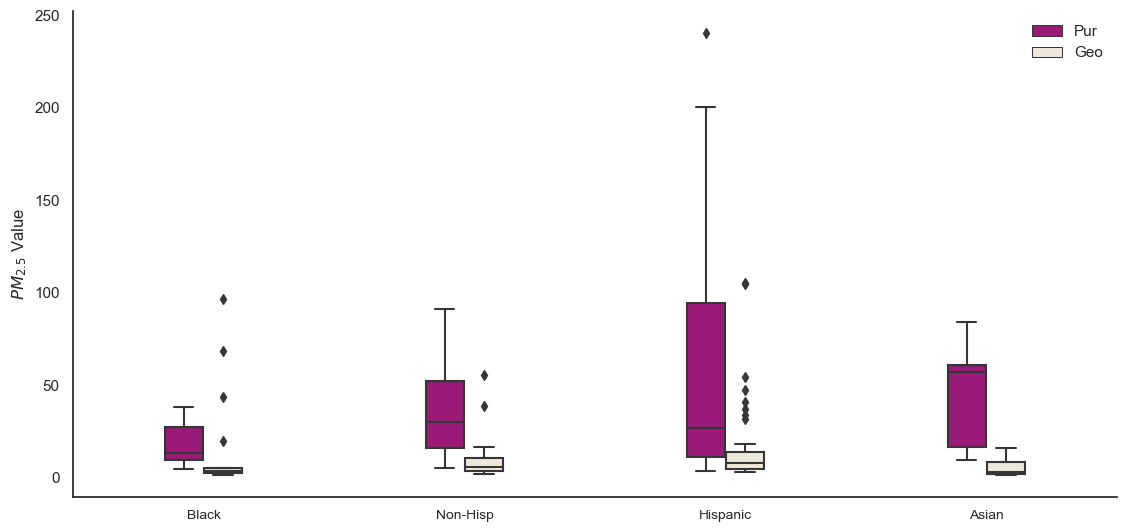

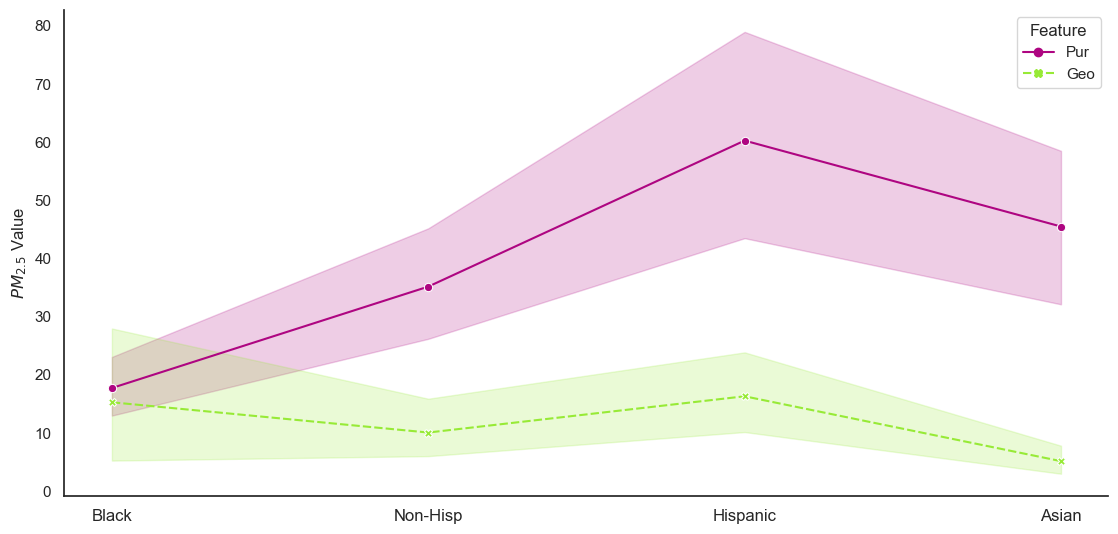

In [115]:
## Code for the BoxPlot

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#F0EAD6']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(parameters, id_vars=['race_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(data=combined_df, x='race_status', y='Values', hue='Feature', palette=colors, width=0.3, dodge=True)  # Set dodge=True to add space between groups
sns.set(font_scale=1.0)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='small'
)

# Show the plot
plt.savefig("Race_boxplot.png")
plt.show()


## Code of the Line Chart

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#97EA36']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(parameters, id_vars=['race_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='race_status', y='Values', hue='Feature', palette=colors, style='Feature', markers=True)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'
)

# Show the plot
plt.legend(title='Feature')
plt.savefig("Race_linechart.png")
plt.show()


# Desciptive stat. of Race

In [116]:
Hispanic['Pur'].describe()

count     45.000000
mean      60.243635
std       63.636131
min        3.795506
25%       11.112890
50%       26.935833
75%       94.499618
max      240.454879
Name: Pur, dtype: float64

In [117]:
Hispanic['Geo'].describe()

count     45.000000
mean      16.296231
std       22.997133
min        2.832403
25%        4.895426
50%        7.764333
75%       14.089366
max      105.016596
Name: Geo, dtype: float64

In [118]:
Non_Hispanic['Pur'].describe()

count    24.000000
mean     35.145066
std      24.862072
min       5.190360
25%      15.870353
50%      30.090000
75%      52.054434
max      90.949754
Name: Pur, dtype: float64

In [119]:
Non_Hispanic['Geo'].describe()

count    24.000000
mean     10.065485
std      12.437226
min       1.953736
25%       3.688643
50%       5.725163
75%      10.529820
max      55.628892
Name: Geo, dtype: float64

In [120]:
African_american['Pur'].describe()

count    18.000000
mean     17.716017
std      11.206763
min       4.545853
25%       9.632657
50%      13.143729
75%      27.406661
max      37.967318
Name: Pur, dtype: float64

In [121]:
African_american['Geo'].describe()

count    18.000000
mean     15.263565
std      26.928783
min       1.699526
25%       2.709233
50%       3.422079
75%       5.232890
max      96.468137
Name: Geo, dtype: float64

In [122]:
Asian['Pur'].describe()

count    13.000000
mean     45.474009
std      24.673796
min       9.798477
25%      16.866345
50%      57.175722
75%      60.829365
max      83.968039
Name: Pur, dtype: float64

In [123]:
Asian['Geo'].describe()

count    13.000000
mean      5.145060
std       4.491315
min       1.623826
25%       2.192984
50%       2.911311
75%       8.585112
max      16.205628
Name: Geo, dtype: float64

# 3. Home Type

In [124]:
# This code removes row that are not relevant to this analysis (i.e., No_response)
condition = ~(parameters['home_status'] == 'No_response')  # Using ~ operator
home = parameters[condition]

In [125]:
Mobile = home[home['home_status'] == 'Mobile'].groupby('ID.1').mean()
family_detach = home[home['home_status'] == 'Fam_detach'].groupby('ID.1').mean()
family_attach = home[home['home_status'] == 'Fam_attach'].groupby('ID.1').mean()
Apartment = home[home['home_status'] == 'Apartment'].groupby('ID.1').mean()
Condo = home[home['home_status'] == 'Condo'].groupby('ID.1').mean()

# Home type: Indoor and Outdoor

In [126]:
aov_g = pg.welch_anova(dv='Geo', between='home_status', data=home)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,home_status,4,23.426622,6.387149,0.00126,0.105292


In [127]:
pg.pairwise_gameshowell(dv='Geo', between='home_status', data=home)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Apartment,Condo,21.028190,2.983760,18.044430,6.928828,2.604254,20.324595,0.106830,0.577869
1,Apartment,Fam_attach,21.028190,14.206014,6.822176,9.458791,0.721252,17.258673,0.948685,0.226904
2,Apartment,Fam_detach,21.028190,6.706939,14.321252,6.978720,2.052132,20.925978,0.277079,0.751480
3,Apartment,Mobile,21.028190,19.160111,1.868080,8.358882,0.223484,36.439457,0.999419,0.066687
4,Condo,Fam_attach,2.983760,14.206014,-11.222254,6.501062,-1.726219,5.095284,0.493083,-0.744029
5,Condo,Fam_detach,2.983760,6.706939,-3.723179,1.223768,-3.042390,20.513494,0.044431,-0.545322
6,Condo,Mobile,2.983760,19.160111,-16.176351,4.760881,-3.397764,24.777343,0.017780,-0.692807
7,Fam_attach,Fam_detach,14.206014,6.706939,7.499075,6.554211,1.144161,5.264748,0.780425,0.889429
8,Fam_attach,Mobile,14.206014,19.160111,-4.954097,8.007875,-0.618653,11.079840,0.969006,-0.214929
9,Fam_detach,Mobile,6.706939,19.160111,-12.453172,4.833204,-2.576587,26.383967,0.104064,-0.807595


# Home type: Outdoor

In [128]:
aov_g = pg.welch_anova(dv='Pur', between='home_status', data=home)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,home_status,4,23.59779,2.00669,0.126247,0.042189


In [129]:
pg.pairwise_gameshowell(dv='Pur', between='home_status', data=home)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Apartment,Condo,33.180986,30.956973,2.224013,6.735013,0.330217,18.514931,0.997193,0.082231
1,Apartment,Fam_attach,33.180986,23.155761,10.025225,10.133343,0.989330,10.938779,0.854722,0.373279
2,Apartment,Fam_detach,33.180986,47.132593,-13.951607,9.327164,-1.495804,59.952239,0.569207,-0.330521
3,Apartment,Mobile,33.180986,55.830968,-22.649982,14.532639,-1.558559,33.080253,0.533361,-0.425722
4,Condo,Fam_attach,30.956973,23.155761,7.801212,8.768505,0.889685,6.232770,0.891306,0.403069
5,Condo,Fam_detach,30.956973,47.132593,-16.175620,7.822918,-2.067722,33.807185,0.257344,-0.345963
6,Condo,Mobile,30.956973,55.830968,-24.873994,13.616154,-1.826800,25.787913,0.380613,-0.379239
7,Fam_attach,Fam_detach,23.155761,47.132593,-23.976832,10.886793,-2.202378,14.578575,0.232581,-0.525107
8,Fam_attach,Mobile,23.155761,55.830968,-32.675206,15.579598,-2.097307,26.954639,0.250344,-0.522959
9,Fam_detach,Mobile,47.132593,55.830968,-8.698375,15.067688,-0.577287,38.237526,0.977632,-0.156907


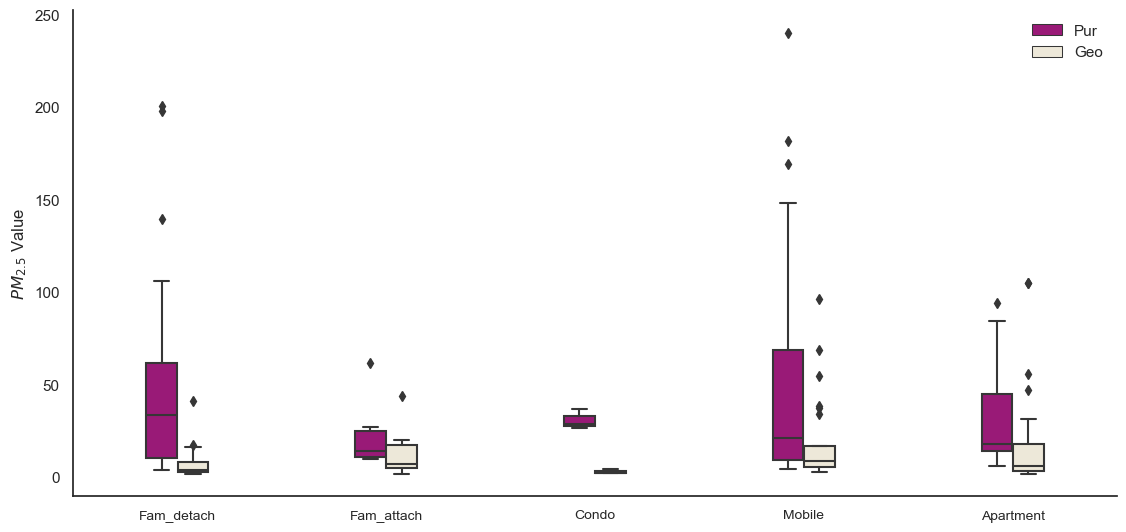

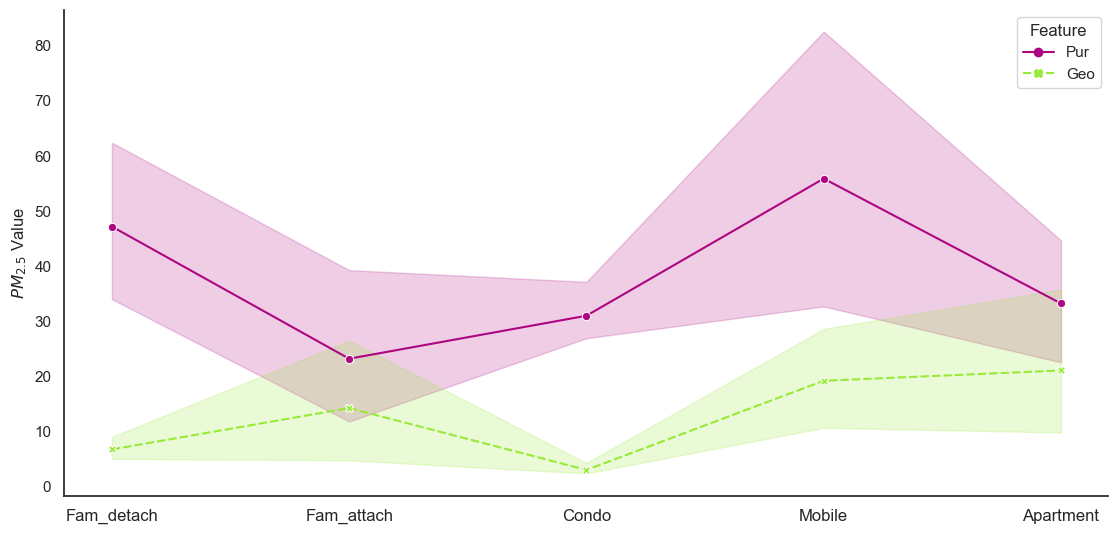

In [130]:
## Code for the BoxPlot

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#F0EAD6']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(home, id_vars=['home_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(data=combined_df, x='home_status', y='Values', hue='Feature', palette=colors, width=0.3, dodge=True)  # Set dodge=True to add space between groups
sns.set(font_scale=1.0)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='small'
)

# Show the plot
plt.savefig("Home_boxplot.png")
plt.show()


## Code of the Line Chart

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#97EA36']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(home, id_vars=['home_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='home_status', y='Values', hue='Feature', palette=colors, style='Feature', markers=True)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'
)

# Show the plot
plt.legend(title='Feature')
plt.savefig("Home_linechart.png")
plt.show()

In [131]:
Mobile['Geo'].describe()

count    25.000000
mean     19.160111
std      23.592436
min       2.885877
25%       5.365174
50%       8.891744
75%      16.740477
max      96.468137
Name: Geo, dtype: float64

In [132]:
Mobile['Pur'].describe()

count     25.000000
mean      55.830968
std       66.260551
min        4.506689
25%        9.359579
50%       21.123941
75%       68.893950
max      240.454879
Name: Pur, dtype: float64

In [133]:
Condo['Geo'].describe()

count    3.000000
mean     2.983760
std      1.097994
min      2.349637
25%      2.349833
50%      2.350028
75%      3.300822
max      4.251615
Name: Geo, dtype: float64

In [134]:
Condo['Pur'].describe()

count     3.000000
mean     30.956973
std       5.416981
min      26.875142
25%      27.884219
50%      28.893297
75%      32.997889
max      37.102481
Name: Pur, dtype: float64

In [135]:
Apartment['Geo'].describe()

count     21.000000
mean      21.028190
std       31.618707
min        1.623826
25%        3.212970
50%        6.199735
75%       18.086490
max      105.016596
Name: Geo, dtype: float64

In [136]:
Apartment['Pur'].describe()

count    21.000000
mean     33.180986
std      27.334276
min       5.964154
25%      14.194144
50%      18.102272
75%      44.973628
max      94.499618
Name: Pur, dtype: float64

In [137]:
family_attach['Geo'].describe()

count     6.000000
mean     14.206014
std      15.848395
min       1.699526
25%       5.227150
50%       7.248199
75%      17.260070
max      43.889332
Name: Geo, dtype: float64

In [138]:
family_attach['Pur'].describe()

count     6.000000
mean     23.155761
std      20.065711
min       9.798477
25%      11.073008
50%      14.412984
75%      24.993180
max      61.830527
Name: Pur, dtype: float64

In [139]:
family_detach['Geo'].describe()

count    43.000000
mean      6.706939
std       6.864181
min       1.891429
25%       2.762867
50%       4.140902
75%       8.504536
max      41.021146
Name: Geo, dtype: float64

In [140]:
family_detach['Pur'].describe()

count     43.000000
mean      47.132593
std       47.020451
min        3.795506
25%       10.341693
50%       33.728402
75%       61.779747
max      200.618932
Name: Pur, dtype: float64

In [141]:
Condo['Geo'].describe()

count    3.000000
mean     2.983760
std      1.097994
min      2.349637
25%      2.349833
50%      2.350028
75%      3.300822
max      4.251615
Name: Geo, dtype: float64

In [142]:
Condo['Pur'].describe()

count     3.000000
mean     30.956973
std       5.416981
min      26.875142
25%      27.884219
50%      28.893297
75%      32.997889
max      37.102481
Name: Pur, dtype: float64

# 4. Area type

In [143]:
Rural = parameters[parameters['address_status'] == 'Rural'].groupby('ID.1').mean()
Urban = parameters[parameters['address_status'] == 'Urban'].groupby('ID.1').mean()

# City Type - Outdoor and Indoor 

In [144]:
# Welch's ANOVA
aov_g = pg.welch_anova(dv='Geo', between='address_status', data=parameters)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,address_status,1,85.78295,0.16714,0.683685,0.001707


In [145]:
# Game Howell
pg.pairwise_gameshowell(dv='Geo', between='address_status', data=parameters)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Rural,Urban,14.168774,12.468005,1.700769,4.160119,0.408827,85.78295,0.683685,0.082599


# City Type - Outdoor 

In [146]:
# Welch's ANOVA
aov_g = pg.welch_anova(dv='Pur', between='address_status', data=parameters)
aov_g

,Source,ddof1,ddof2,F,p-unc,np2
0,address_status,1,69.55479,0.000429,0.983535,0.000005


In [147]:
# Game Howell
pg.pairwise_gameshowell(dv='Pur', between='address_status', data=parameters)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Rural,Urban,44.518658,44.732723,-0.214065,10.335405,-0.020712,69.55479,0.983535,-0.004404


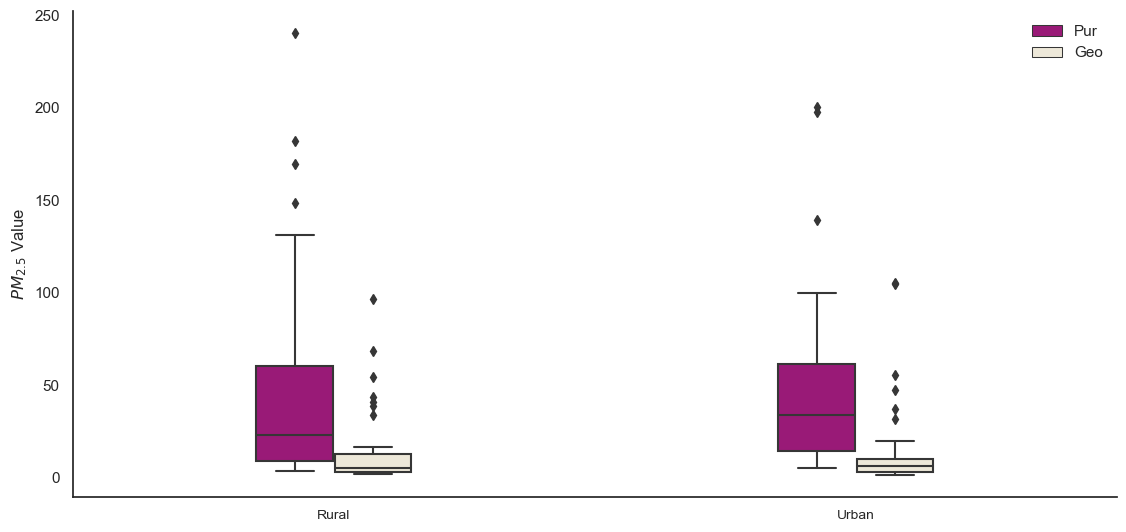

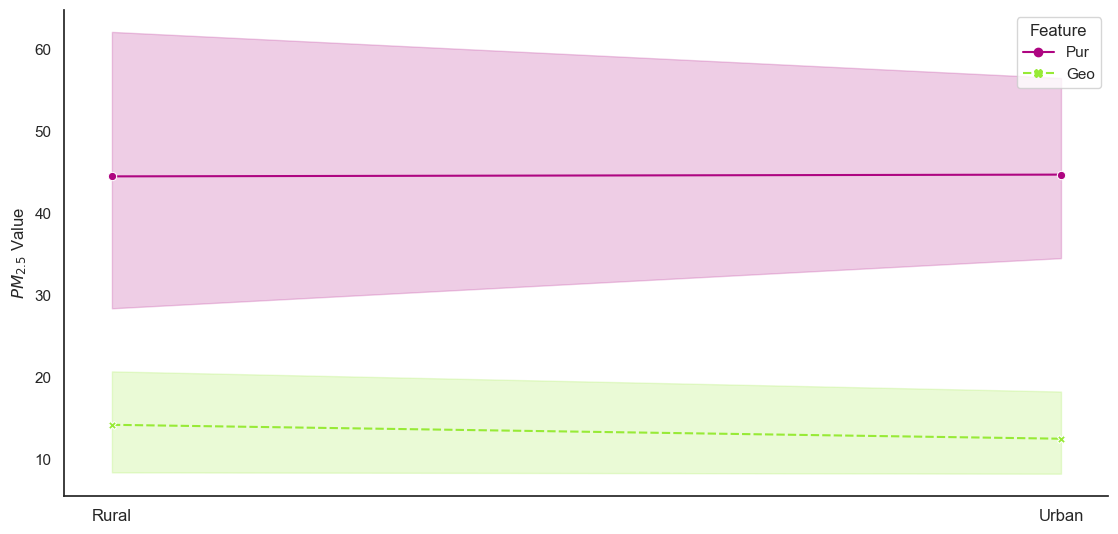

In [148]:
## Code for the BoxPlot

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#F0EAD6']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(parameters, id_vars=['address_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(data=combined_df, x='address_status', y='Values', hue='Feature', palette=colors, width=0.3, dodge=True)  # Set dodge=True to add space between groups
sns.set(font_scale=1.0)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='small'
)

# Show the plot
plt.savefig("Area_boxplot.png")
plt.show()


## Code of the Line Chart

# Set the style of seaborn
sns.set(style="white")
colors = ['#AE0581', '#97EA36']

# Combine 'Pur' and 'Geo' into a single DataFrame for plotting
combined_df = pd.melt(parameters, id_vars=['address_status'], value_vars=['Pur', 'Geo'], var_name='Feature', value_name='Values')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='address_status', y='Values', hue='Feature', palette=colors, style='Feature', markers=True)

sns.despine()

# Remove x-label
plt.xlabel(None)

# Set labels and title
plt.ylabel('$PM_{2.5}$ Value')
plt.title('')

plt.legend(frameon=False)
plt.xticks(
    rotation=0,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'
)

# Show the plot
plt.legend(title='Feature')
plt.savefig("Area_linechart.png")
plt.show()

# Descriptive Statistics

In [149]:
Rural['Pur'].describe()

count     41.000000
mean      44.518658
std       56.251032
min        3.795506
25%        9.156132
50%       23.255924
75%       60.407920
max      240.454879
Name: Pur, dtype: float64

In [150]:
Rural['Geo'].describe()

count    41.000000
mean     14.168774
std      20.523953
min       2.082727
25%       3.007641
50%       5.425578
75%      12.855662
max      96.468137
Name: Geo, dtype: float64

In [151]:
Urban['Pur'].describe()

count     59.000000
mean      44.732723
std       41.822067
min        5.233887
25%       14.228287
50%       33.728402
75%       61.354989
max      200.618932
Name: Pur, dtype: float64

In [152]:
Urban['Geo'].describe()

count     59.000000
mean      12.468005
std       20.369702
min        1.623826
25%        3.133357
50%        6.161406
75%       10.271236
max      105.016596
Name: Geo, dtype: float64